In [1]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import datetime 
import matplotlib.dates as mdates

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
from matplotlib import rcParams

plt.style.use('ggplot')
rcParams['figure.figsize'] = 16, 9
rcParams['pdf.fonttype'] = 42
rcParams['font.size'] = 18
rcParams['axes.linewidth'] = 2

In [3]:
df = pd.read_csv('./../data/Steel_industry_data.csv')
# df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y %H:%M')
load = df['Usage_kWh']
time = df['date']

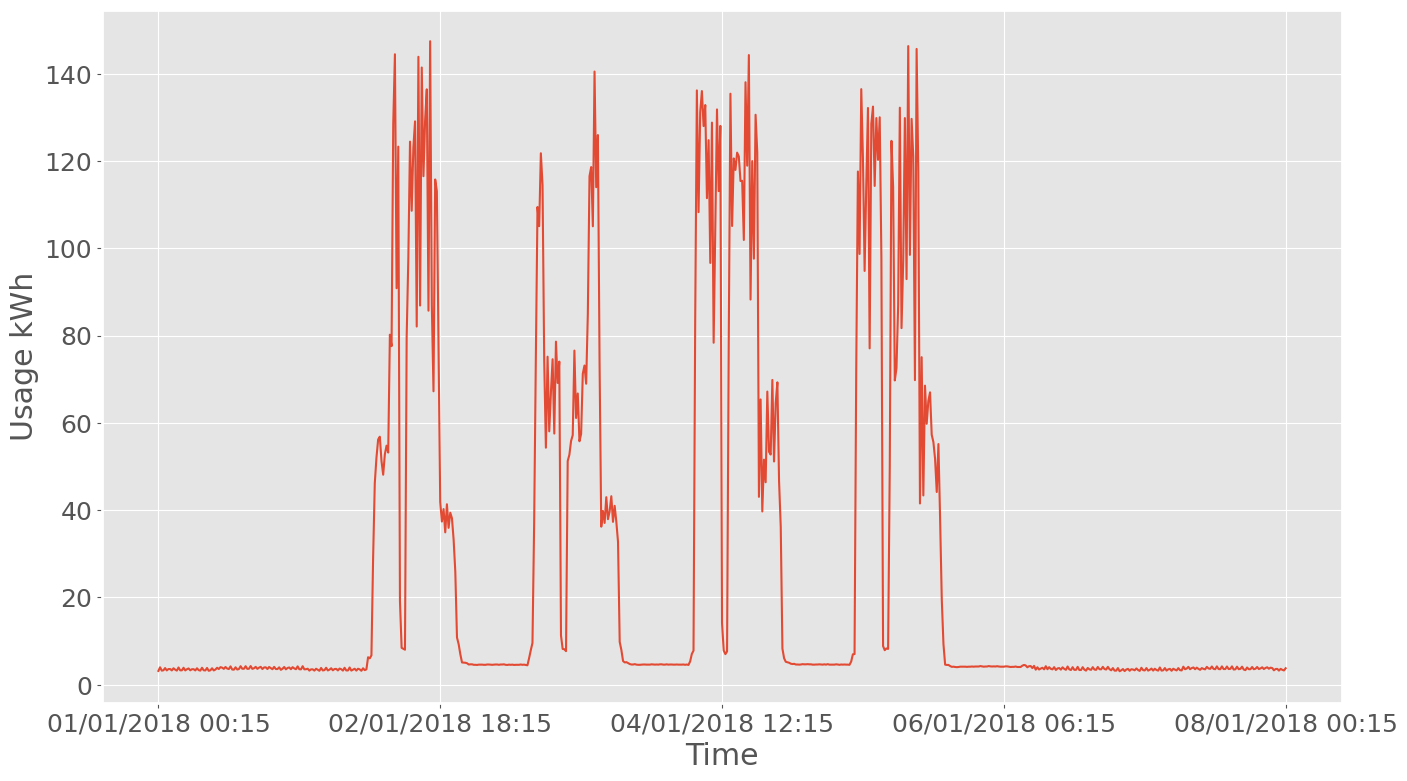

In [4]:
plt.plot(time[:673], load[:673])
plt.xticks(np.arange(0, 673, step = 168))
plt.xlabel('Time')
plt.ylabel('Usage kWh')
plt.savefig('UsageWeek.png')
plt.show()

In [6]:
#replace 0 value with the minimum value except 0
second_min = min(load[load != 0])
load[load == 0] = second_min
display(load[load == 0])

C:\Users\sevann radhak\AppData\Local\Temp\ipykernel_5520\2982811346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load[load == 0] = second_min


Series([], Name: Usage_kWh, dtype: float64)

In [7]:
display(load.describe())

count    35040.000000
mean        27.386962
std         33.444325
min          2.450000
25%          3.200000
50%          4.570000
75%         51.237500
max        157.180000
Name: Usage_kWh, dtype: float64

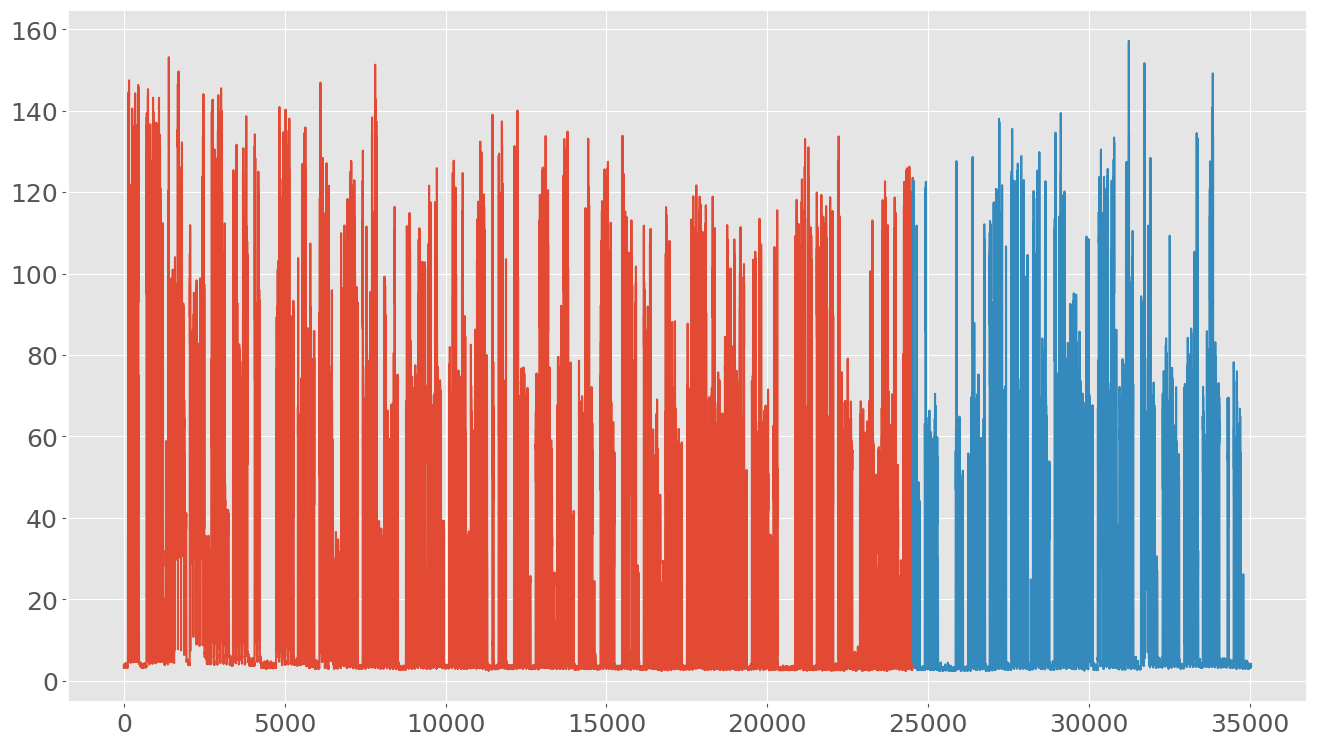

In [8]:
train = load[:int(len(load)*0.7)]
test = load[int(len(load)*0.7):]
plt.plot(train)
plt.plot(test)
plt.show()

<Figure size 1600x900 with 0 Axes>

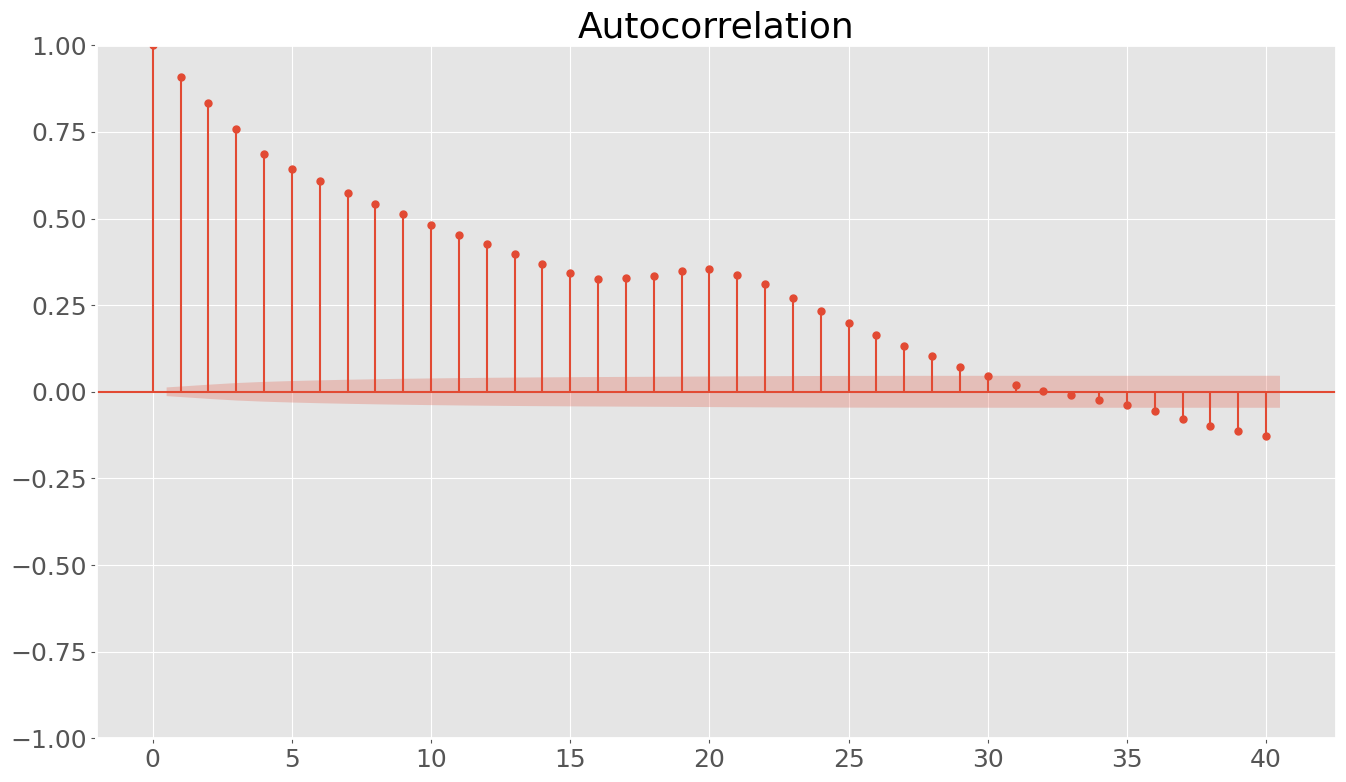

<Figure size 1600x900 with 0 Axes>

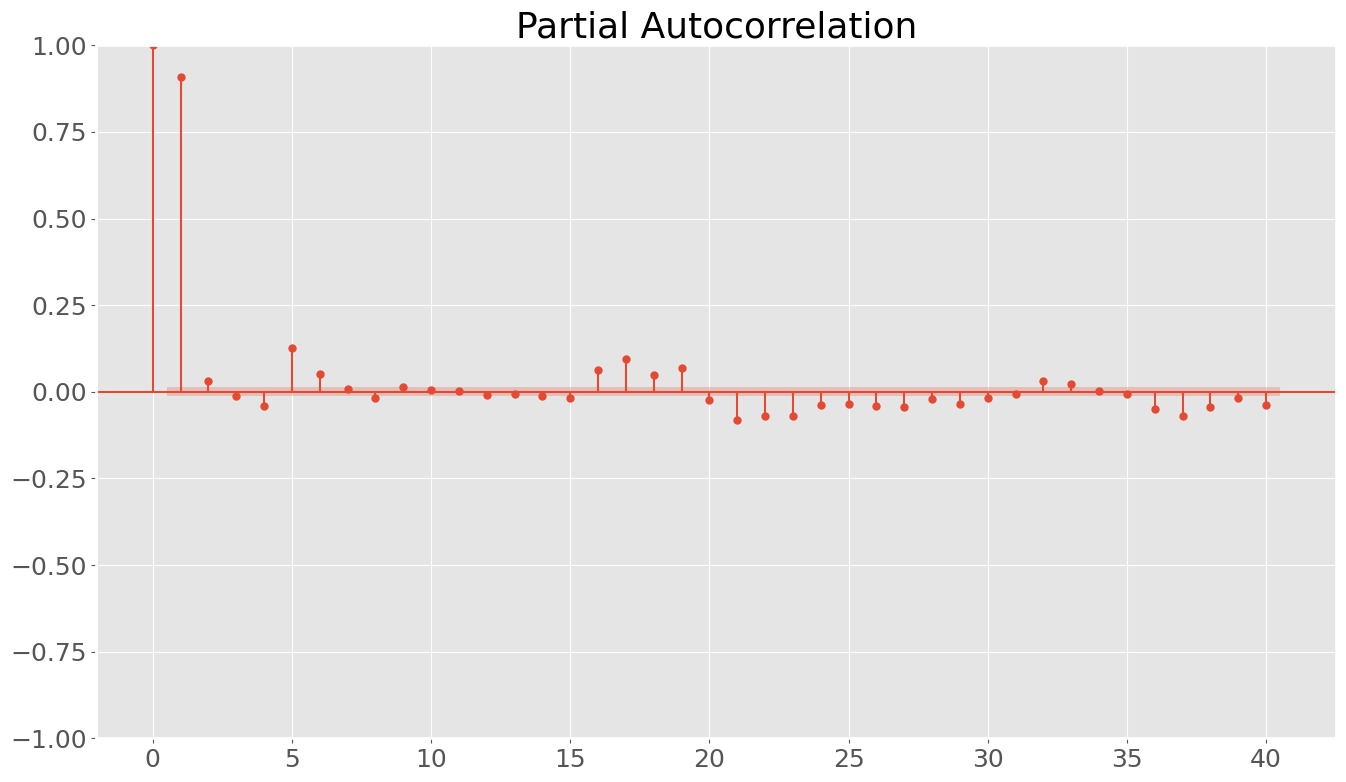

In [9]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure()
acf_values = acf(train)
plot_acf(train, lags=40)
plt.show()

plt.figure()
pacf_values = pacf(train)
plot_pacf(train, lags=40)
plt.show()

In [10]:
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)

for i in range(1,4):
    df_train["lag{}".format(i)] = df_train["Usage_kWh"].shift(i)
    df_test["lag{}".format(i)] = df_test["Usage_kWh"].shift(i)

df_train = df_train.bfill()
df_train = df_train.drop(columns = ["Usage_kWh"])
df_test = df_test.bfill()
df_test = df_test.drop(columns = ["Usage_kWh"])

display(df_train, df_test)

,lag1,lag2,lag3
0,3.17,3.17,3.17
1,3.17,3.17,3.17
2,4.00,3.17,3.17
3,3.24,4.00,3.17
4,3.31,3.24,4.00
...,...,...,...
24523,51.80,78.44,123.55
24524,53.60,51.80,78.44
24525,50.33,53.60,51.80
24526,51.01,50.33,53.60


,lag1,lag2,lag3
24528,7.31,7.31,7.31
24529,7.31,7.31,7.31
24530,4.43,7.31,7.31
24531,4.50,4.43,7.31
24532,5.08,4.50,4.43
...,...,...,...
35035,3.82,3.67,3.24
35036,3.85,3.82,3.67
35037,3.74,3.85,3.82
35038,3.78,3.74,3.85


# Empirical M Decomposition - SVM¶

In [11]:
!pip install emd

# EEMD

<Axes: xlabel='Time (samples)'>

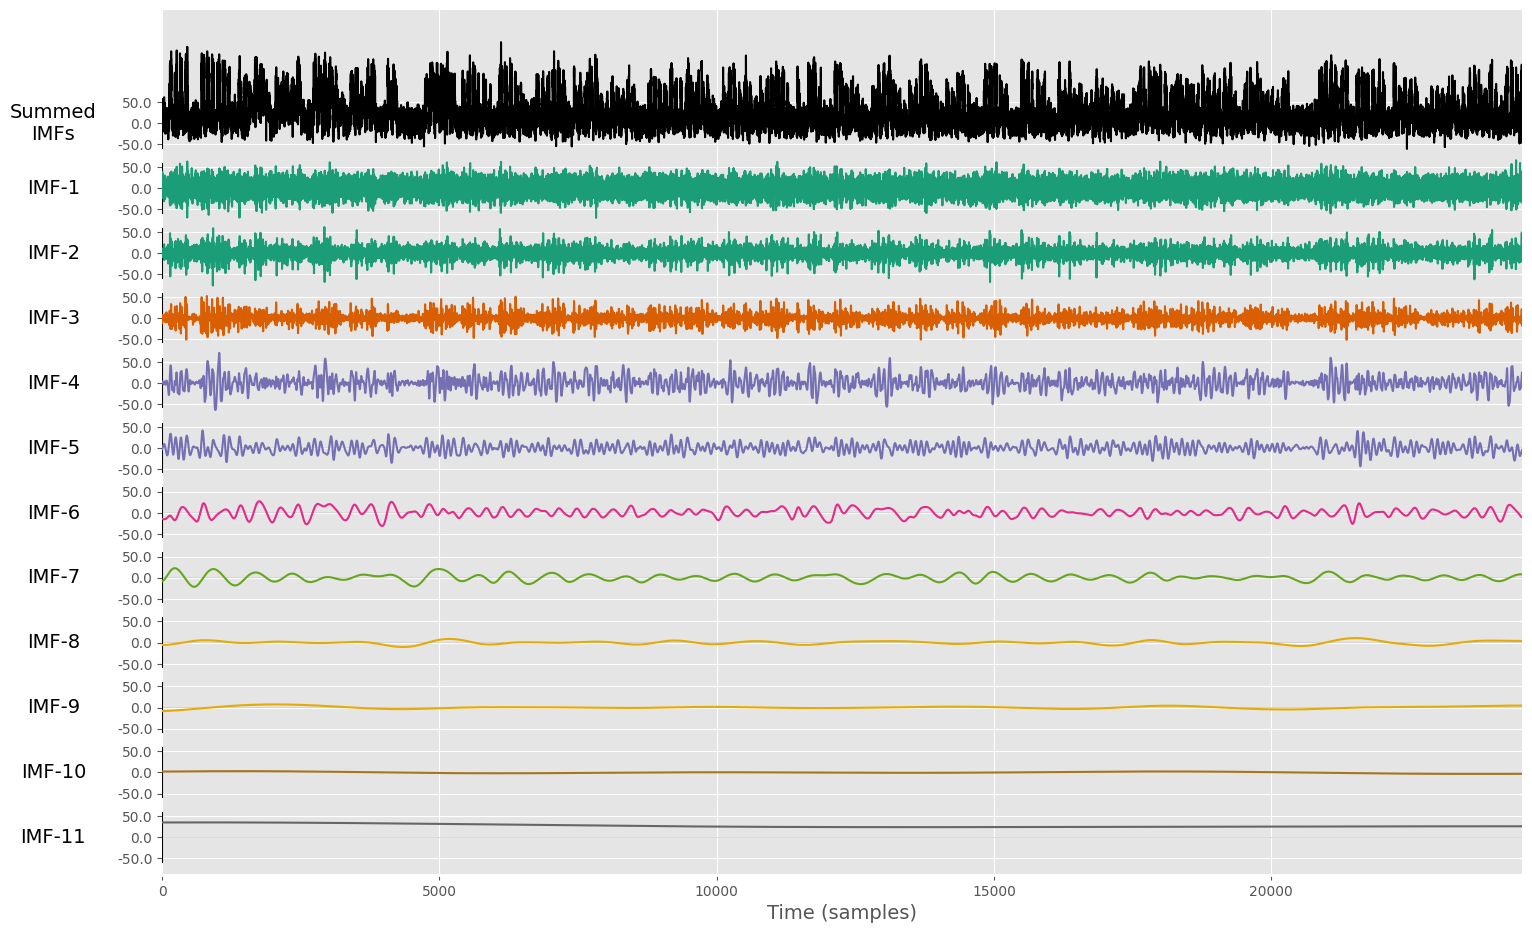

In [13]:
import emd

imf_eemd = emd.sift.ensemble_sift(np.array(train), nensembles=4, nprocesses=6, ensemble_noise=1, imf_opts={'sd_thresh': 0.1})
emd.plotting.plot_imfs(imf_eemd)

In [14]:
imf_eemd_df = pd.DataFrame(data = imf_eemd)
imf_eemd_df.columns = ['imf_eemd_{}'.format(i+1) for i in range(0, imf_eemd.shape[1])]
display(imf_eemd_df)

,imf_eemd_1,imf_eemd_2,imf_eemd_3,imf_eemd_4,imf_eemd_5,imf_eemd_6,imf_eemd_7,imf_eemd_8,imf_eemd_9,imf_eemd_10,imf_eemd_11
0,38.536388,-2.211490,-12.278708,0.350657,-3.498936,-14.488793,-8.631728,-5.751606,-8.561055,2.073922,35.257824
1,13.850244,1.287216,-10.986480,0.771344,-3.145176,-14.557552,-8.568294,-5.748018,-8.555378,2.075125,35.258147
2,36.243449,4.568400,-8.859162,1.247449,-2.768453,-14.622684,-8.502298,-5.744341,-8.549686,2.076328,35.258470
3,16.752836,3.343835,-6.139085,1.750628,-2.370526,-14.684301,-8.433754,-5.740575,-8.543979,2.077529,35.258793
4,-15.727855,-0.480486,-3.091115,2.255905,-1.953154,-14.742516,-8.362677,-5.736720,-8.538256,2.078731,35.259115
...,...,...,...,...,...,...,...,...,...,...,...
24523,-3.854905,-7.361876,-4.967549,25.012024,-5.307951,-10.422895,8.011369,3.962098,4.664895,-3.296743,26.237018
24524,21.176954,-12.355621,-11.829821,24.785547,-5.031249,-10.424165,8.002924,3.961275,4.664473,-3.296320,26.237078
24525,22.285889,-7.801182,-16.587403,24.225756,-4.793977,-10.417576,7.994039,3.960454,4.664044,-3.295896,26.237138
24526,36.588516,-2.964324,-18.427350,23.350205,-4.599823,-10.403215,7.984716,3.959636,4.663609,-3.295472,26.237198


In [15]:
imf1_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf1_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_1'])
imf1_eemd_SVR_fc = imf1_eemd_SVR.predict(np.array(df_test))

imf2_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf2_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_2'])
imf2_eemd_SVR_fc = imf2_eemd_SVR.predict(np.array(df_test))

imf3_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf3_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_3'])
imf3_eemd_SVR_fc = imf3_eemd_SVR.predict(np.array(df_test))

imf4_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf4_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_4'])
imf4_eemd_SVR_fc = imf4_eemd_SVR.predict(np.array(df_test))

imf5_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf5_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_5'])
imf5_eemd_SVR_fc = imf5_eemd_SVR.predict(np.array(df_test))

imf6_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf6_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_6'])
imf6_eemd_SVR_fc = imf6_eemd_SVR.predict(np.array(df_test))

imf7_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf7_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_7'])
imf7_eemd_SVR_fc = imf7_eemd_SVR.predict(np.array(df_test))

imf8_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf8_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_8'])
imf8_eemd_SVR_fc = imf8_eemd_SVR.predict(np.array(df_test))

imf9_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf9_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_9'])
imf9_eemd_SVR_fc = imf9_eemd_SVR.predict(np.array(df_test))

imf10_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf10_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_10'])
imf10_eemd_SVR_fc = imf10_eemd_SVR.predict(np.array(df_test))

imf11_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
imf11_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_11'])
imf11_eemd_SVR_fc = imf11_eemd_SVR.predict(np.array(df_test))

In [16]:
imf_eemd_list = ['imf{}_eemd_SVR_fc'.format(i) for i in range(1,11)]

imf_eemd_fc = np.sum([imf1_eemd_SVR_fc, imf2_eemd_SVR_fc, imf3_eemd_SVR_fc,
                imf4_eemd_SVR_fc, imf5_eemd_SVR_fc,imf6_eemd_SVR_fc,
                imf7_eemd_SVR_fc,imf8_eemd_SVR_fc,imf9_eemd_SVR_fc, imf10_eemd_SVR_fc], axis = 0)

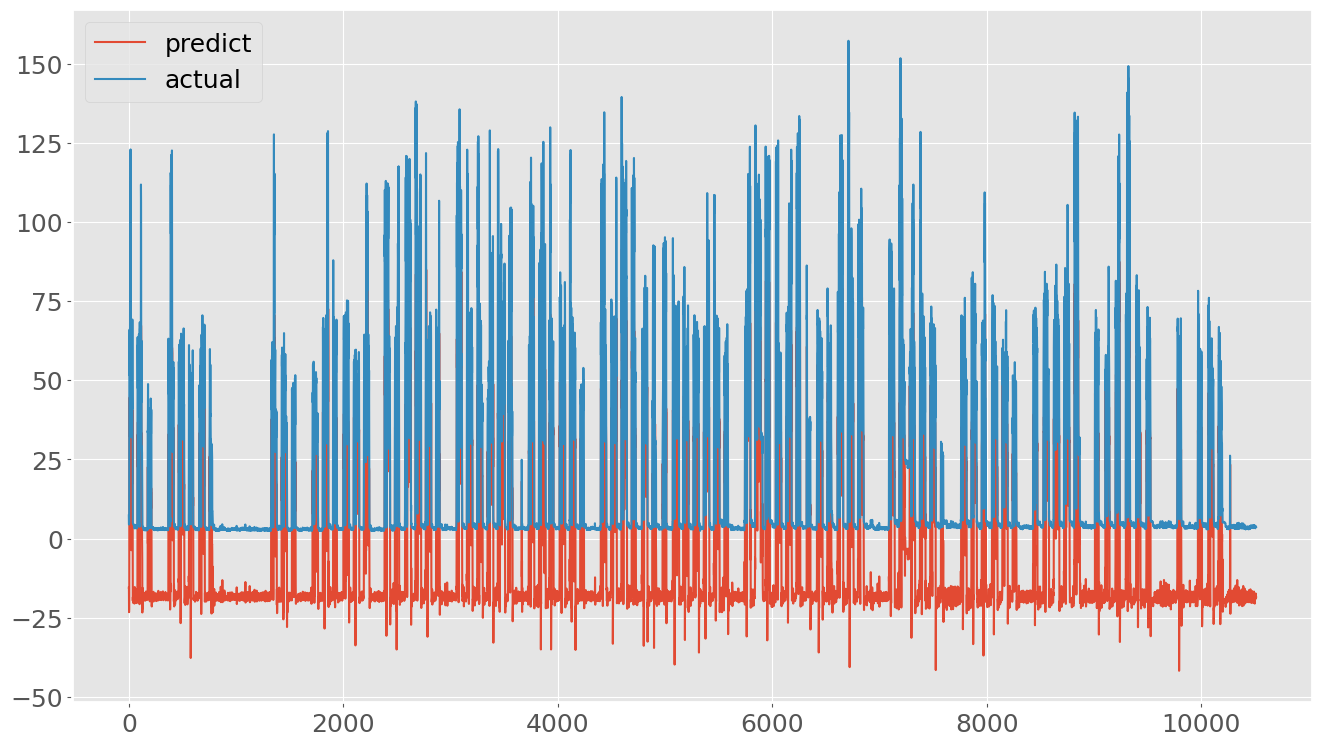

RMSE = 740.7611679585603 
MAE = 25.092371110763796 
MAPE = 4.232217643615487


In [17]:
plt.plot(imf_eemd_fc,label = 'predict')
plt.plot(test.values, label = 'actual')
plt.legend()
plt.savefig('EEMDSVR')
plt.show()

RMSE_EEMD_SVR = mean_squared_error(test, imf_eemd_fc)
MAE_EEMD_SVR  =mean_absolute_error(test, imf_eemd_fc)
MAPE_EEMD_SVR = mean_absolute_percentage_error(test, imf_eemd_fc)
print('RMSE = {}'.format(RMSE_EEMD_SVR), '\nMAE = {}'.format(MAE_EEMD_SVR), '\nMAPE = {}'.format(MAPE_EEMD_SVR))

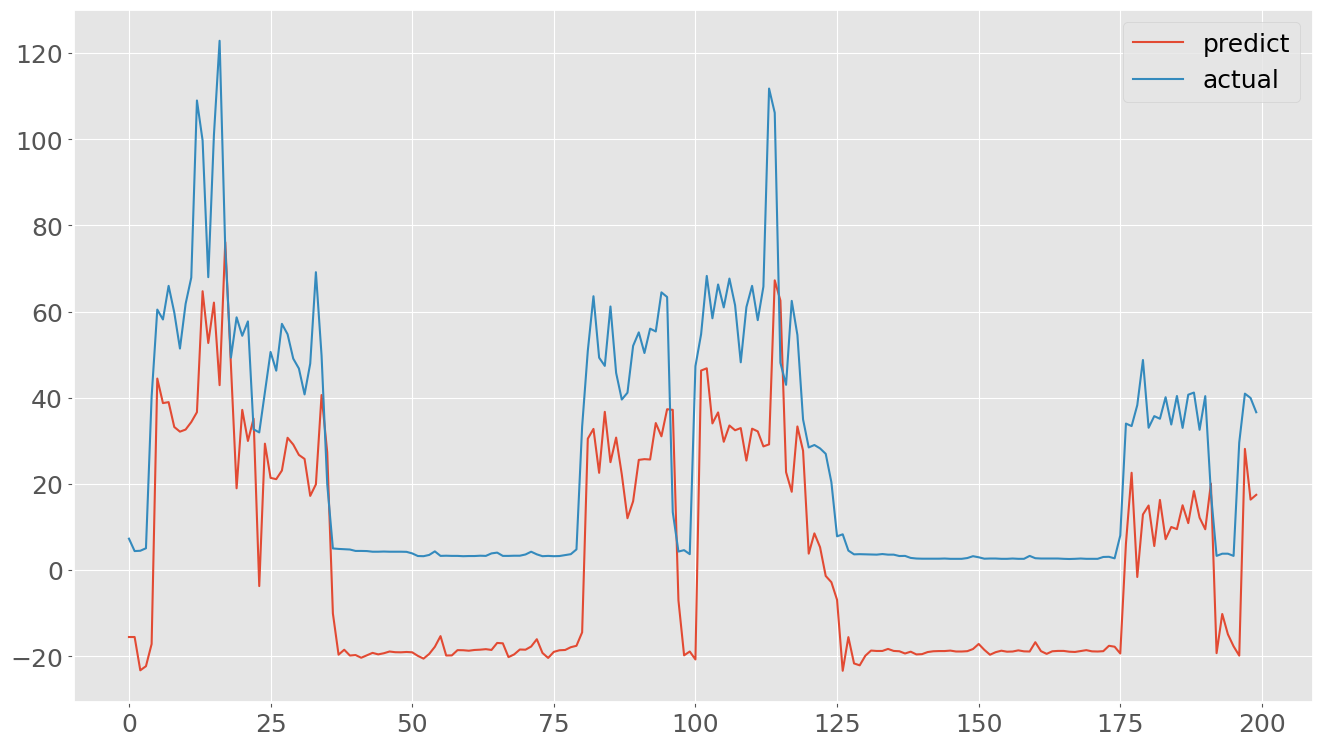

MSE = 740.7611679585603 
MAE = 25.092371110763796 
MAPE = 4.232217643615487


In [18]:
plt.plot(imf_eemd_fc[:200], label = 'predict')
plt.plot(test[:200].values, label = 'actual')
plt.legend()
plt.savefig('EEMDSVR_200')
plt.show()

RMSE_EEMD_SVR = mean_squared_error(test, imf_eemd_fc)
MAE_EEMD_SVR  =mean_absolute_error(test, imf_eemd_fc)
MAPE_EEMD_SVR = mean_absolute_percentage_error(test, imf_eemd_fc)
print('MSE = {}'.format(RMSE_EEMD_SVR), '\nMAE = {}'.format(MAE_EEMD_SVR), '\nMAPE = {}'.format(MAPE_EEMD_SVR))

In [19]:
imf1_eemd_SVR_fc = imf1_eemd_SVR.predict(np.array(df_train))
imf2_eemd_SVR_fc = imf2_eemd_SVR.predict(np.array(df_train))
imf3_eemd_SVR_fc = imf3_eemd_SVR.predict(np.array(df_train))
imf4_eemd_SVR_fc = imf4_eemd_SVR.predict(np.array(df_train))
imf5_eemd_SVR_fc = imf5_eemd_SVR.predict(np.array(df_train))
imf6_eemd_SVR_fc = imf6_eemd_SVR.predict(np.array(df_train))
imf7_eemd_SVR_fc = imf7_eemd_SVR.predict(np.array(df_train))
imf8_eemd_SVR_fc = imf8_eemd_SVR.predict(np.array(df_train))
imf9_eemd_SVR_fc = imf9_eemd_SVR.predict(np.array(df_train))
imf10_eemd_SVR_fc = imf10_eemd_SVR.predict(np.array(df_train))
imf11_eemd_SVR_fc = imf11_eemd_SVR.predict(np.array(df_train))

imf_eemd_fc_train = np.sum([imf1_eemd_SVR_fc, imf2_eemd_SVR_fc, imf3_eemd_SVR_fc,
                imf4_eemd_SVR_fc, imf5_eemd_SVR_fc,imf6_eemd_SVR_fc,
                imf7_eemd_SVR_fc,imf8_eemd_SVR_fc,imf9_eemd_SVR_fc, imf10_eemd_SVR_fc, imf11_eemd_SVR_fc], axis = 0)

In [21]:
from scipy.optimize import minimize

def dummy1(c):
    global train
    global imf_eemd_fc_train
    return mean_squared_error(train, imf_eemd_fc_train + c)

res1 = minimize(dummy1, 0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
print(res1.x)

Optimization terminated successfully.
         Current function value: 167.656208
         Iterations: 39
         Function evaluations: 81
[-1.65237694]


In [22]:
RMSE_EEMD_SVR = mean_squared_error(test, imf_eemd_fc + res1.x[0])
MAE_EEMD_SVR  =mean_absolute_error(test, imf_eemd_fc + res1.x[0])
MAPE_EEMD_SVR = mean_absolute_percentage_error(test, imf_eemd_fc + res1.x[0])
print('RMSE = {}'.format(RMSE_EEMD_SVR), '\nMAE = {}'.format(MAE_EEMD_SVR), '\nMAPE = {}'.format(MAPE_EEMD_SVR))

RMSE = 824.2211146498687 
MAE = 26.67702013911362 
MAPE = 4.540244586191518


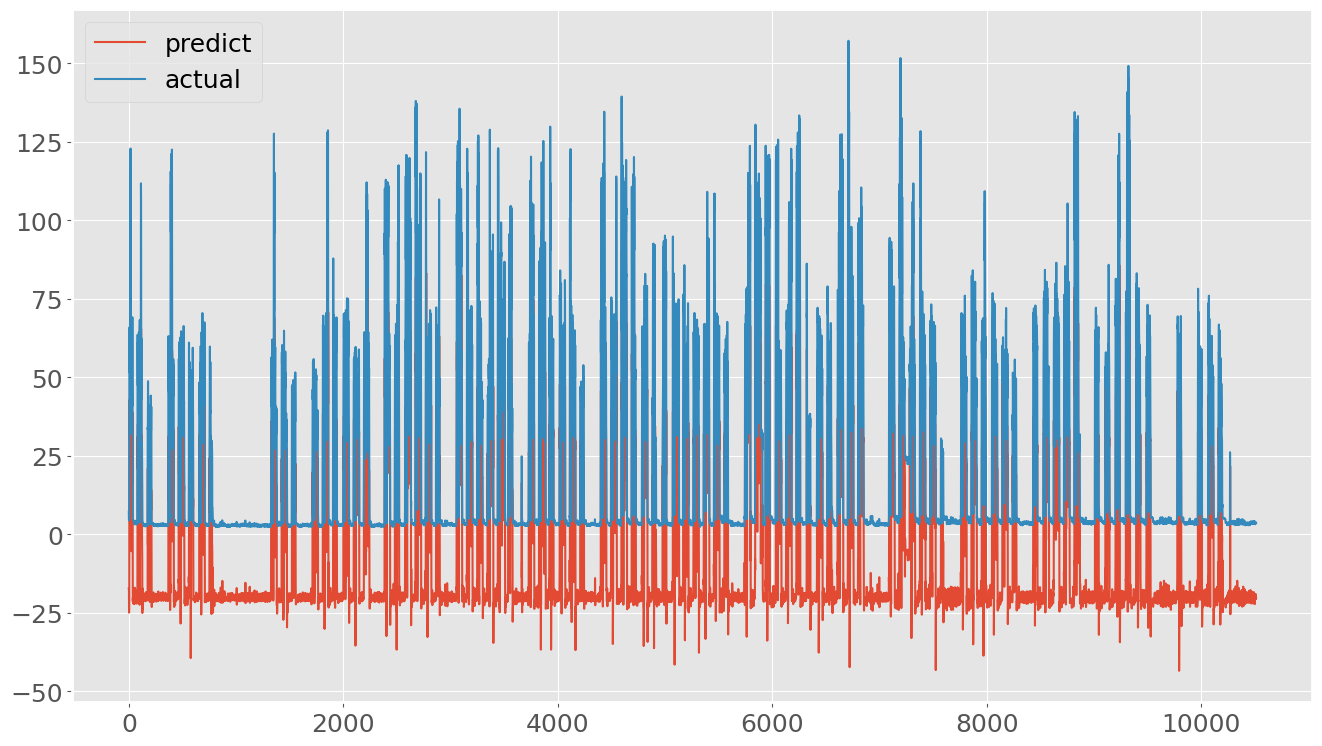

In [23]:
plt.plot(imf_eemd_fc + res1.x[0], label = 'predict')
plt.plot(test.values, label = 'actual')
plt.legend()
plt.savefig('ImprovedEEMDSVR')
plt.show()

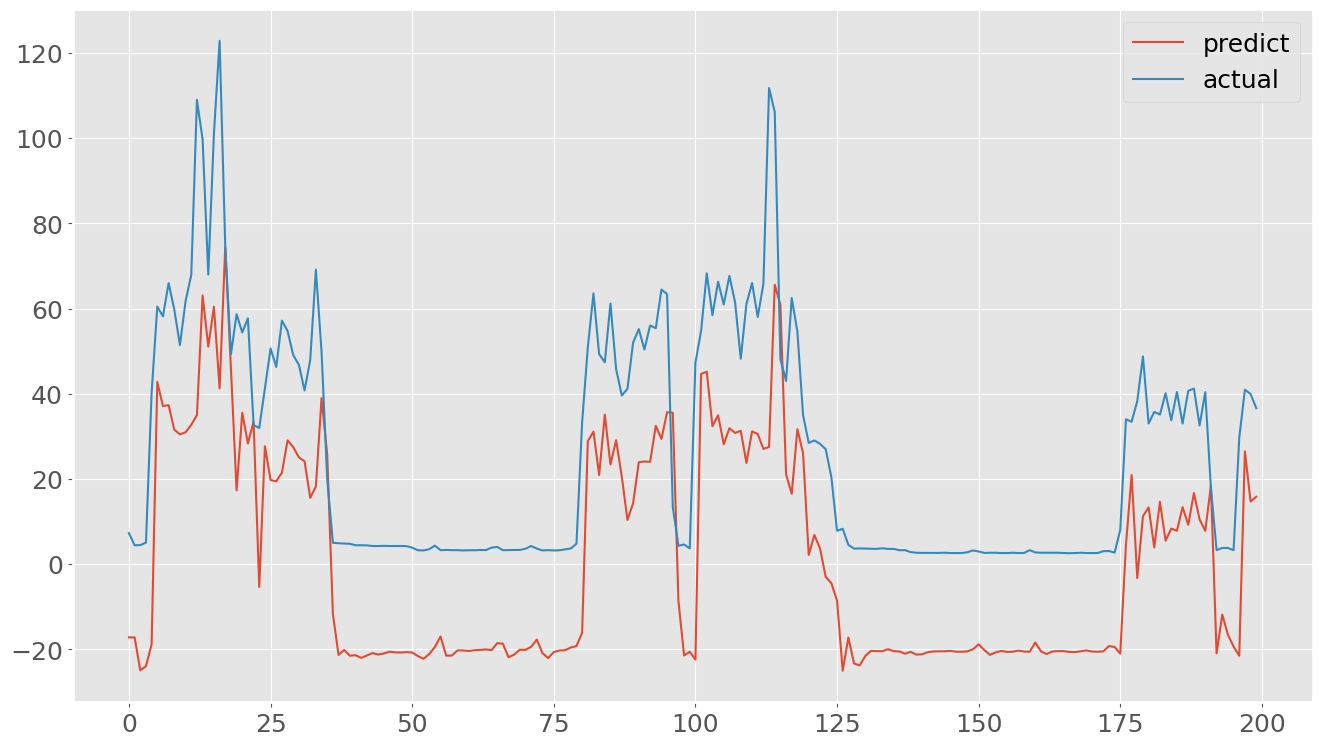

In [24]:
plt.plot(imf_eemd_fc[:200] + res1.x[0], label = 'predict')
plt.plot(test.values[:200], label = 'actual')
plt.legend()
plt.savefig('ImprovedEEMDSVR_200')
plt.show()

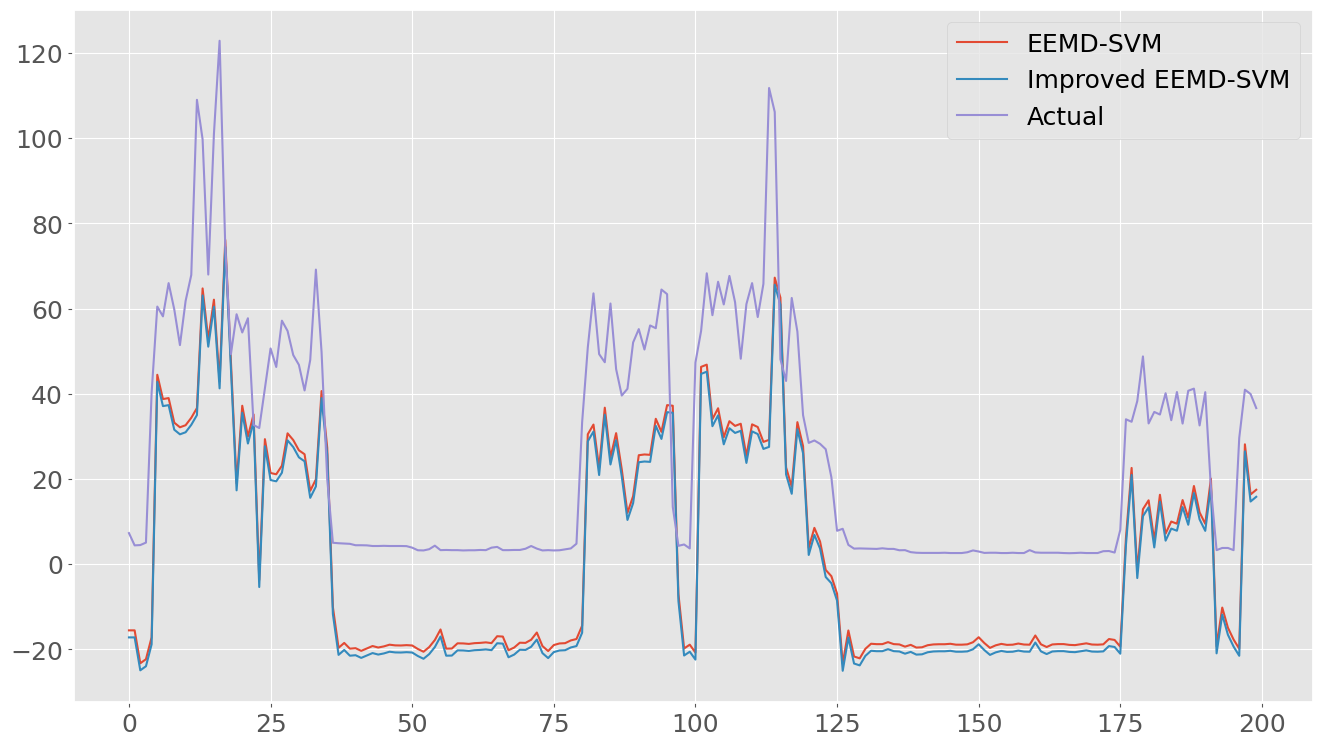

In [26]:
# plt.plot(arima_fc.values[:200], label = 'ARIMA')
# plt.plot(arima_SVR_fc[:200]+arima_fc.values[:200], label = 'ARIMA-SVM')
# plt.plot(hw_fc.values[:200], label = 'HW')
# plt.plot(hw_SVR_fc[:200]+hw_fc.values[:200], label = 'HW-SVM')
# plt.plot(SVR_fc[:200], label = 'SVM')
# plt.plot(SVR_MA_3_fc[0:200], label = 'SMA-SVM')
# plt.plot(imf_fc[:200], label = 'EMD-SVM')
# plt.plot(imf_fc[:200] + res.x[0], label = 'Improved EMD-SVM')
plt.plot(imf_eemd_fc[:200], label = 'EEMD-SVM')
plt.plot(imf_eemd_fc[:200] + res1.x[0], label = 'Improved EEMD-SVM')
plt.plot(test.values[:200], label = 'Actual')
plt.legend()
plt.savefig('Summary')
plt.show()